In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Task 1 part: Adding a Win Rate column

In [78]:
battles = pd.read_csv('./battles.csv', sep =',')

In [79]:
pokemon = pd.read_csv('./pokemon.csv', sep =',')

In [80]:
pokemon['Involved'] = 0
pokemon['Wins'] = 0
count = 0
win = 0
for id in pokemon['#']:
    for id_battle in battles['First_pokemon']:
        if id == id_battle:
            count += 1
    for id_battle in battles['Second_pokemon']:
        if id == id_battle:
            count += 1
    for id_battle in battles['Winner']:
        if id == id_battle:
            win += 1
    if count > 0:
        pokemon.loc[id-1,'Involved'] = count
    else:
        pokemon.loc[id-1,'Involved'] = np.nan
        pokemon.loc[id-1,'Wins'] = np.nan
    pokemon.loc[id-1,'Wins'] = win
    count = 0
    win = 0

In [81]:

def f(involved, wins):
        return wins/involved
    
pokemon['Win Rate'] = f(pokemon['Involved'], pokemon['Wins'])
pokemon['Win Rate'] = pokemon['Win Rate'].replace([np.inf, -np.inf], np.nan)
pokemon['Win Rate'] = pokemon['Win Rate'].fillna(0.5)


In [82]:
pokemon.drop(['Involved'], axis=1, inplace=True)
pokemon.drop(['Wins'], axis=1, inplace=True)
pokemon

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Has Gender,Legendary,Win Rate
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,True,False,0.254902
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,True,False,0.395833
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,True,False,0.631068
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,True,False,0.578947
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,True,False,0.445652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,False,True,0.386364
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,False,True,0.911765
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,False,True,0.528090
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,False,True,0.617886


# Task 2 part: Linear Regression for 6 features

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
model_HP = LinearRegression()

X = pokemon
y = pokemon['Win Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)
#model for HP
X_train_HP = X_train['HP'].values.reshape(-1, 1)
X_test_HP = X_test['HP'].values.reshape(-1, 1)
model_HP.fit(X_train_HP, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

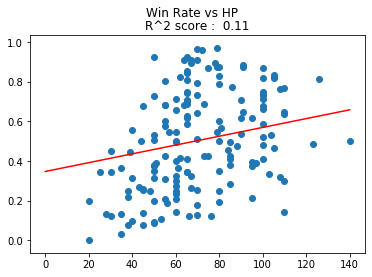

R^2 score: 0.11


In [84]:
#graph for HP
xfit = np.linspace(0, 140, 1000)
yfit = model_HP.predict(xfit[:, np.newaxis])
y_pred = model_HP.predict(X_test_HP)
plt.scatter(X_test_HP, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs HP")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

In [85]:
model_Attack = LinearRegression()
#model for attack
X_train_Attack = X_train['Attack'].values.reshape(-1, 1)
X_test_Attack = X_test['Attack'].values.reshape(-1, 1)
model_Attack.fit(X_train_Attack, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

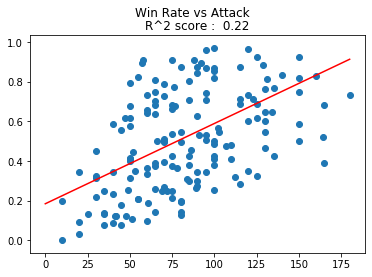

R^2 score: 0.22


In [86]:
#graph for attack
xfit = np.linspace(0, 180, 1000)
yfit = model_Attack.predict(xfit[:, np.newaxis])
y_pred = model_Attack.predict(X_test_Attack)
plt.scatter(X_test_Attack, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs Attack")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

In [87]:
model_Defense = LinearRegression()
#model for defense
X_train_Defense = X_train['Defense'].values.reshape(-1, 1)
X_test_Defense = X_test['Defense'].values.reshape(-1, 1)
model_Defense.fit(X_train_Defense, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

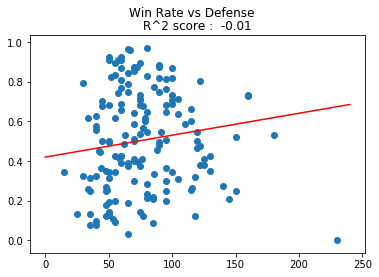

R^2 score: -0.01


In [88]:
#graph for defense
xfit = np.linspace(0, 240, 1000)
yfit = model_Defense.predict(xfit[:, np.newaxis])
y_pred = model_Defense.predict(X_test_Defense)
plt.scatter(X_test_Defense, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs Defense")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

In [89]:
model_SpAtk = LinearRegression()
#model for spatk
X_train_SpAtk = X_train['Sp. Atk'].values.reshape(-1, 1)
X_test_SpAtk = X_test['Sp. Atk'].values.reshape(-1, 1)
model_SpAtk.fit(X_train_SpAtk, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

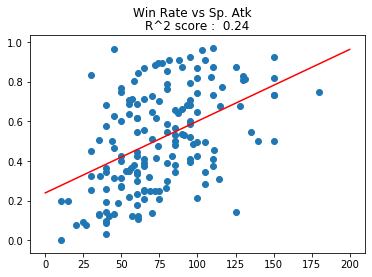

R^2 score: 0.24


In [90]:
#graph for spatk
xfit = np.linspace(0, 200, 1000)
yfit = model_SpAtk.predict(xfit[:, np.newaxis])
y_pred = model_SpAtk.predict(X_test_SpAtk)
plt.scatter(X_test_SpAtk, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs Sp. Atk")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

In [91]:
model_SpDef = LinearRegression()
#model for spdef
X_train_SpDef = X_train['Sp. Def'].values.reshape(-1, 1)
X_test_SpDef = X_test['Sp. Def'].values.reshape(-1, 1)
model_SpDef.fit(X_train_SpDef, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

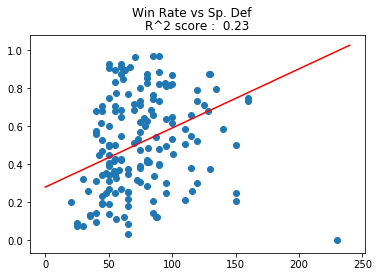

R^2 score: 0.23


In [92]:
#graph for spdef
xfit = np.linspace(0, 240, 1000)
yfit = model_SpDef.predict(xfit[:, np.newaxis])
y_pred = model_SpDef.predict(X_test_SpAtk)
plt.scatter(X_test_SpDef, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs Sp. Def")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

In [93]:
model_Speed = LinearRegression()
#model for speed
X_train_Speed = X_train['Speed'].values.reshape(-1, 1)
X_test_Speed = X_test['Speed'].values.reshape(-1, 1)
model_Speed.fit(X_train_Speed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

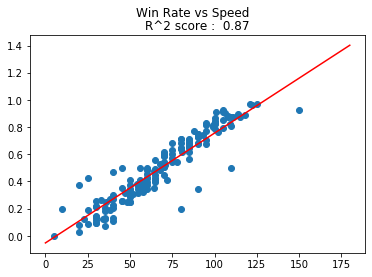

R^2 score: 0.87


In [94]:
#graph for speed
xfit = np.linspace(0, 180, 1000)
yfit = model_Speed.predict(xfit[:, np.newaxis])
y_pred = model_Speed.predict(X_test_Speed)
plt.scatter(X_test_Speed, y_test)
plt.plot(xfit, yfit, color = 'red')
plt.suptitle("Win Rate vs Speed")
plt.title("R^2 score :  %.2f" % r2_score(y_test, y_pred))
plt.show()

print('R^2 score: %.2f' % r2_score(y_test, y_pred))

# Task 3.1 part: Logistic Regression for legendary pokemon

In [95]:
import scipy.special
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix
from time import time
one_hot = pd.get_dummies(pokemon[['Type 1', 'Type 2']])
pokemon = pd.concat([pokemon, one_hot], axis=1)

In [96]:
features = pd.concat([pokemon.iloc[:,4:12],pokemon.iloc[:,14:49]], axis=1).values
X = features
y = pokemon['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4211)

**setting 1(not stable convergence) :  η  = 0.7, adaptive learning rate (random_state 0, 1, 2 for each the three repetition)**
   

In [97]:
clf_sgd = SGDClassifier(loss='log', max_iter=100, random_state=0, verbose=1, learning_rate ='adaptive', eta0 = 0.7)
start = time()
clf_sgd.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 274.38, NNZs: 41, Bias: -15.050000, T: 640, Avg. loss: 2824.867408
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 328.88, NNZs: 42, Bias: -29.750000, T: 1280, Avg. loss: 2577.347575
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 367.22, NNZs: 42, Bias: -44.450000, T: 1920, Avg. loss: 2761.741746
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 295.12, NNZs: 42, Bias: -57.050000, T: 2560, Avg. loss: 2958.537670
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 327.78, NNZs: 42, Bias: -73.150000, T: 3200, Avg. loss: 2760.729828
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 476.29, NNZs: 42, Bias: -85.050000, T: 3840, Avg. loss: 2671.789584
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 489.34, NNZs: 42, Bias: -99.750000, T: 4480, Avg. loss: 2772.123224
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 368.26, NNZs: 42, Bias: -101.710000, T: 5120, Avg. loss: 1056.839050
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 323.98, NNZs: 43, Bias:

In [98]:

y_hat = clf_sgd.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time1 = log_time
setting1_acc1 = accuracy_score(y_test, y_hat)
setting1_f1 = f1_score(y_test, y_hat)

The training time of the model: 0.05 .
accuracy: 0.88125
f1: 0.42424242424242425


In [99]:
clf_sgd = SGDClassifier(loss='log', max_iter=100, random_state=1, verbose=1, learning_rate ='adaptive', eta0 = 0.7)
start = time()
clf_sgd.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 350.48, NNZs: 40, Bias: -17.150000, T: 640, Avg. loss: 2760.089069
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 341.33, NNZs: 41, Bias: -31.150000, T: 1280, Avg. loss: 2808.190502
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 443.45, NNZs: 42, Bias: -45.150000, T: 1920, Avg. loss: 2787.950682
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 319.06, NNZs: 43, Bias: -58.450000, T: 2560, Avg. loss: 2575.494753
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 458.62, NNZs: 43, Bias: -75.250000, T: 3200, Avg. loss: 2895.756405
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 478.53, NNZs: 43, Bias: -86.450000, T: 3840, Avg. loss: 2534.598689
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 598.38, NNZs: 43, Bias: -99.750000, T: 4480, Avg. loss: 2775.263996
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 426.80, NNZs: 43, Bias: -110.950000, T: 5120, Avg. loss: 2848.468669
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 433.48, NNZs: 43, Bias:

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [100]:
y_hat = clf_sgd.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time2 = log_time
setting1_acc2 = accuracy_score(y_test, y_hat)
setting1_f12 = f1_score(y_test, y_hat)

The training time of the model: 0.06 .
accuracy: 0.875
f1: 0.4117647058823529


In [101]:
clf_sgd = SGDClassifier(loss='log', max_iter=100, random_state=2, verbose=1, learning_rate ='adaptive', eta0 = 0.7)
start = time()
clf_sgd.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 356.82, NNZs: 40, Bias: -16.450000, T: 640, Avg. loss: 2681.264171
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 482.28, NNZs: 41, Bias: -31.150000, T: 1280, Avg. loss: 2690.412104
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 480.28, NNZs: 41, Bias: -46.550000, T: 1920, Avg. loss: 2700.718148
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 375.13, NNZs: 41, Bias: -61.250000, T: 2560, Avg. loss: 3123.947489
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 462.16, NNZs: 42, Bias: -75.950000, T: 3200, Avg. loss: 2671.302308
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 493.55, NNZs: 42, Bias: -89.250000, T: 3840, Avg. loss: 2954.444103
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 424.58, NNZs: 42, Bias: -101.850000, T: 4480, Avg. loss: 2766.919238
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 471.24, NNZs: 42, Bias: -115.150000, T: 5120, Avg. loss: 2732.415074
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 478.60, NNZs: 42, Bias

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [102]:
y_hat = clf_sgd.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time3 = log_time
setting1_acc3 = accuracy_score(y_test, y_hat)
setting1_f13 = f1_score(y_test, y_hat)
set1_time = np.array([setting1_time1, setting1_time2, setting1_time3])
mean_time = np.mean(set1_time)
std_time = np.std(set1_time)
set1_acc = np.array([setting1_acc1, setting1_acc2, setting1_acc3])
mean_acc = np.mean(set1_acc)
std_acc = np.std(set1_acc)
set1_f1 = np.array([setting1_f1, setting1_f12, setting1_f13])
mean_f1 = np.mean(set1_f1)
std_f1 = np.std(set1_f1)
print("The mean training time of the model: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model: %.17f (std: %.17f) ."
      % (mean_acc, std_acc))
print("The mean F1 score time of the model: %.17f (std: %.17f) ."
      % (mean_f1, std_f1))

The training time of the model: 0.06 .
accuracy: 0.9
f1: 0.5
The mean training time of the model: 0.05750465393066406 (std: 0.00497832148495019) .
The mean accuracy time of the model: 0.88541666666666663 (std: 0.01062295731998498) .
The mean F1 score time of the model: 0.44533571004159239 (std: 0.03898770585163963) .


**setting 2(not stable convergence):  η  = 0.5, adaptive learning rate (random_state 0, 1, 2 for each the three repetition)**

In [103]:
clf_sgd_2 = SGDClassifier(loss='log', max_iter=100, random_state=0, verbose=1, learning_rate ='adaptive', eta0 = 0.5)
start = time()
clf_sgd_2.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 197.34, NNZs: 41, Bias: -10.750000, T: 640, Avg. loss: 2017.856022
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 283.86, NNZs: 42, Bias: -20.750000, T: 1280, Avg. loss: 1775.396118
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 271.12, NNZs: 42, Bias: -30.250000, T: 1920, Avg. loss: 2031.454361
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 224.12, NNZs: 42, Bias: -39.750000, T: 2560, Avg. loss: 2208.122617
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 258.72, NNZs: 42, Bias: -50.249938, T: 3200, Avg. loss: 1790.468525
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 405.50, NNZs: 42, Bias: -59.774004, T: 3840, Avg. loss: 1847.084664
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 337.85, NNZs: 42, Bias: -70.274004, T: 4480, Avg. loss: 2075.753100
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 259.53, NNZs: 42, Bias: -71.774004, T: 5120, Avg. loss: 702.994651
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 234.44, NNZs: 42, Bias: -

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [104]:
y_hat = clf_sgd_2.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time1 = log_time
setting2_acc1 = accuracy_score(y_test, y_hat)
setting2_f1 = f1_score(y_test, y_hat)

The training time of the model: 0.07 .
accuracy: 0.8875
f1: 0.43749999999999994


In [105]:
clf_sgd_2 = SGDClassifier(loss='log', max_iter=100, random_state=1, verbose=1, learning_rate ='adaptive', eta0 = 0.5)
start = time()
clf_sgd_2.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 252.02, NNZs: 40, Bias: -12.250000, T: 640, Avg. loss: 1971.366275
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 245.65, NNZs: 41, Bias: -22.750000, T: 1280, Avg. loss: 1872.313614
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 293.74, NNZs: 41, Bias: -31.750000, T: 1920, Avg. loss: 1838.710446
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 216.66, NNZs: 42, Bias: -41.250000, T: 2560, Avg. loss: 1728.955743
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 307.68, NNZs: 42, Bias: -51.750000, T: 3200, Avg. loss: 2108.917122
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 323.71, NNZs: 42, Bias: -60.250000, T: 3840, Avg. loss: 1802.609722
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 391.47, NNZs: 42, Bias: -69.749822, T: 4480, Avg. loss: 1968.683052
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 402.30, NNZs: 42, Bias: -81.249822, T: 5120, Avg. loss: 1930.829507
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 356.74, NNZs: 43, Bias: 

In [106]:
y_hat = clf_sgd_2.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time2 = log_time
setting2_acc2 = accuracy_score(y_test, y_hat)
setting2_f12 = f1_score(y_test, y_hat)

The training time of the model: 0.07 .
accuracy: 0.86875
f1: 0.39999999999999997


In [107]:
clf_sgd_2 = SGDClassifier(loss='log', max_iter=100, random_state=2, verbose=1, learning_rate ='adaptive', eta0 = 0.5)
start = time()
clf_sgd_2.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 253.64, NNZs: 40, Bias: -11.250000, T: 640, Avg. loss: 1869.658693
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 347.24, NNZs: 41, Bias: -22.250000, T: 1280, Avg. loss: 1968.482560
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 337.05, NNZs: 41, Bias: -32.750000, T: 1920, Avg. loss: 1992.683296
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 269.44, NNZs: 41, Bias: -43.250000, T: 2560, Avg. loss: 2202.215062
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 413.12, NNZs: 42, Bias: -52.250001, T: 3200, Avg. loss: 1848.165968
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 396.64, NNZs: 43, Bias: -62.249560, T: 3840, Avg. loss: 2017.654898
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 330.88, NNZs: 43, Bias: -72.249560, T: 4480, Avg. loss: 2011.989096
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 382.22, NNZs: 43, Bias: -80.749560, T: 5120, Avg. loss: 1750.017162
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 363.89, NNZs: 43, Bias: 

Norm: 367.72, NNZs: 43, Bias: -146.961509, T: 44800, Avg. loss: 12.452070
Total training time: 0.05 seconds.
-- Epoch 71
Norm: 367.72, NNZs: 43, Bias: -146.961521, T: 45440, Avg. loss: 12.388822
Total training time: 0.05 seconds.
-- Epoch 72
Norm: 367.72, NNZs: 43, Bias: -146.961535, T: 46080, Avg. loss: 12.388105
Total training time: 0.05 seconds.
-- Epoch 73
Norm: 367.72, NNZs: 43, Bias: -146.961545, T: 46720, Avg. loss: 12.385210
Total training time: 0.05 seconds.
-- Epoch 74
Norm: 367.72, NNZs: 43, Bias: -146.961563, T: 47360, Avg. loss: 12.386309
Total training time: 0.05 seconds.
-- Epoch 75
Norm: 367.72, NNZs: 43, Bias: -146.961579, T: 48000, Avg. loss: 12.386430
Total training time: 0.05 seconds.
-- Epoch 76
Norm: 367.72, NNZs: 43, Bias: -146.961582, T: 48640, Avg. loss: 12.372281
Total training time: 0.05 seconds.
-- Epoch 77
Norm: 367.72, NNZs: 43, Bias: -146.961585, T: 49280, Avg. loss: 12.372185
Total training time: 0.05 seconds.
-- Epoch 78
Norm: 367.72, NNZs: 43, Bias: -1

In [108]:
y_hat = clf_sgd_2.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time3 = log_time
setting2_acc3 = accuracy_score(y_test, y_hat)
setting2_f13 = f1_score(y_test, y_hat)
set2_time = np.array([setting2_time1, setting2_time2, setting2_time3])
mean_time = np.mean(set2_time)
std_time = np.std(set2_time)
set2_acc = np.array([setting2_acc1, setting2_acc2, setting2_acc3])
mean_acc = np.mean(set2_acc)
std_acc = np.std(set2_acc)
set2_f1 = np.array([setting2_f1, setting2_f12, setting2_f13])
mean_f1 = np.mean(set2_f1)
std_f1 = np.std(set2_f1)
print("The mean training time of the model: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model: %.17f (std: %.17f) ."
      % (mean_acc, std_acc))
print("The mean F1 score time of the model: %.17f (std: %.17f) ."
      % (mean_f1, std_f1))

The training time of the model: 0.06 .
accuracy: 0.8875
f1: 0.43749999999999994
The mean training time of the model: 0.06582164764404297 (std: 0.00533686147867773) .
The mean accuracy time of the model: 0.88124999999999998 (std: 0.00883883476483181) .
The mean F1 score time of the model: 0.42499999999999999 (std: 0.01767766952966368) .


**setting 3(stable convergence) :  η  = 0.1, adaptive learning rate (random_state 0, 1, 2 for each the three repetition)**

In [109]:
clf_sgd_3 = SGDClassifier(loss='log', max_iter=100, random_state=0, verbose=1, learning_rate ='adaptive', eta0 = 0.1)
start = time()
clf_sgd_3.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 40.75, NNZs: 42, Bias: -2.250000, T: 640, Avg. loss: 403.875308
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 45.17, NNZs: 42, Bias: -4.244676, T: 1280, Avg. loss: 363.079223
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 44.14, NNZs: 42, Bias: -6.154921, T: 1920, Avg. loss: 391.175144
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 35.39, NNZs: 42, Bias: -7.884341, T: 2560, Avg. loss: 423.600670
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 54.08, NNZs: 42, Bias: -10.382385, T: 3200, Avg. loss: 397.522231
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 78.60, NNZs: 43, Bias: -11.991451, T: 3840, Avg. loss: 381.560451
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 63.50, NNZs: 43, Bias: -13.891451, T: 4480, Avg. loss: 434.708349
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 48.99, NNZs: 43, Bias: -14.107418, T: 5120, Avg. loss: 130.045685
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 47.71, NNZs: 43, Bias: -14.450079, T: 5760, 

In [110]:
y_hat = clf_sgd_3.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting3_time1 = log_time
setting3_acc1 = accuracy_score(y_test, y_hat)
setting3_f1 = f1_score(y_test, y_hat)

The training time of the model: 0.06 .
accuracy: 0.9
f1: 0.5


In [111]:
clf_sgd_3 = SGDClassifier(loss='log', max_iter=100, random_state=1, verbose=1, learning_rate ='adaptive', eta0 = 0.1)
start = time()
clf_sgd_3.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 52.73, NNZs: 42, Bias: -2.350012, T: 640, Avg. loss: 395.731500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 62.62, NNZs: 43, Bias: -4.250012, T: 1280, Avg. loss: 390.578438
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 67.60, NNZs: 43, Bias: -6.250012, T: 1920, Avg. loss: 378.853143
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 56.71, NNZs: 43, Bias: -8.150012, T: 2560, Avg. loss: 385.740560
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 61.34, NNZs: 43, Bias: -10.150012, T: 3200, Avg. loss: 419.292246
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 70.81, NNZs: 43, Bias: -11.950012, T: 3840, Avg. loss: 328.808963
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 86.01, NNZs: 43, Bias: -14.050012, T: 4480, Avg. loss: 388.172183
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 76.21, NNZs: 43, Bias: -15.950018, T: 5120, Avg. loss: 387.626414
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 78.87, NNZs: 43, Bias: -17.950597, T: 5760, 

Norm: 82.04, NNZs: 43, Bias: -26.167906, T: 51840, Avg. loss: 3.597229
Total training time: 0.05 seconds.
-- Epoch 82
Norm: 82.04, NNZs: 43, Bias: -26.167911, T: 52480, Avg. loss: 3.597192
Total training time: 0.05 seconds.
-- Epoch 83
Norm: 82.04, NNZs: 43, Bias: -26.167917, T: 53120, Avg. loss: 3.597089
Total training time: 0.05 seconds.
-- Epoch 84
Norm: 82.04, NNZs: 43, Bias: -26.167923, T: 53760, Avg. loss: 3.597134
Total training time: 0.05 seconds.
-- Epoch 85
Norm: 82.04, NNZs: 43, Bias: -26.167929, T: 54400, Avg. loss: 3.597035
Total training time: 0.05 seconds.
-- Epoch 86
Norm: 82.04, NNZs: 43, Bias: -26.167930, T: 55040, Avg. loss: 3.594032
Total training time: 0.05 seconds.
-- Epoch 87
Norm: 82.04, NNZs: 43, Bias: -26.167931, T: 55680, Avg. loss: 3.594023
Total training time: 0.05 seconds.
-- Epoch 88
Norm: 82.04, NNZs: 43, Bias: -26.167932, T: 56320, Avg. loss: 3.594012
Total training time: 0.05 seconds.
-- Epoch 89
Norm: 82.04, NNZs: 43, Bias: -26.167933, T: 56960, Avg. 

In [112]:
y_hat = clf_sgd_3.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting3_time2 = log_time
setting3_acc2 = accuracy_score(y_test, y_hat)
setting3_f12 = f1_score(y_test, y_hat)

The training time of the model: 0.06 .
accuracy: 0.86875
f1: 0.39999999999999997


In [113]:
clf_sgd_3 = SGDClassifier(loss='log', max_iter=100, random_state= 2, verbose=1, learning_rate ='adaptive', eta0 = 0.1)
start = time()
clf_sgd_3.fit(X_train, y_train)
log_time = time()-start

-- Epoch 1
Norm: 55.31, NNZs: 41, Bias: -2.350000, T: 640, Avg. loss: 381.805725
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 64.18, NNZs: 42, Bias: -4.350103, T: 1280, Avg. loss: 399.290291
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 67.36, NNZs: 42, Bias: -6.453052, T: 1920, Avg. loss: 376.934638
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 52.09, NNZs: 42, Bias: -8.448055, T: 2560, Avg. loss: 418.189823
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 73.59, NNZs: 43, Bias: -10.447155, T: 3200, Avg. loss: 376.037336
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 60.20, NNZs: 43, Bias: -12.447157, T: 3840, Avg. loss: 410.675623
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 67.11, NNZs: 43, Bias: -14.525940, T: 4480, Avg. loss: 386.571739
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 87.38, NNZs: 43, Bias: -16.525940, T: 5120, Avg. loss: 364.806967
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 81.53, NNZs: 43, Bias: -18.425940, T: 5760, 

In [114]:
y_hat = clf_sgd_3.predict(X_test)
print("The training time of the model: %.2f ."
      % (log_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting3_time3 = log_time
setting3_acc3 = accuracy_score(y_test, y_hat)
setting3_f13 = f1_score(y_test, y_hat)
set3_time = np.array([setting3_time1, setting3_time2, setting3_time3])
mean_time = np.mean(set3_time)
std_time = np.std(set3_time)
set3_acc = np.array([setting3_acc1, setting3_acc2, setting3_acc3])
mean_acc = np.mean(set3_acc)
std_acc = np.std(set3_acc)
set3_f1 = np.array([setting3_f1, setting3_f12, setting3_f13])
mean_f1 = np.mean(set3_f1)
std_f1 = np.std(set3_f1)
print("The mean training time of the model: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model: %.17f (std: %.17f) ."
      % (mean_acc, std_acc))
print("The mean F1 score time of the model: %.17f (std: %.17f) ."
      % (mean_f1, std_f1))

The training time of the model: 0.07 .
accuracy: 0.8875
f1: 0.43749999999999994
The mean training time of the model: 0.06216629346211752 (std: 0.00497485763522954) .
The mean accuracy time of the model: 0.88541666666666663 (std: 0.01284252917285203) .
The mean F1 score time of the model: 0.44583333333333330 (std: 0.04124789556921529) .


# Task 3.2 Single-hidden-layer Neural Networks
**Settings: H ∈ {1,2,4,8,16,32,64}, max_iter = 500, others hyperparameter are default**

In [115]:
from sklearn import  metrics
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

#model H=1
mlp = MLPClassifier(hidden_layer_sizes=(1, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time1 = NN_time
setting1_acc1 = accuracy_score(y_test, y_hat)
setting1_f1 = f1_score(y_test, y_hat)


Iteration 1, loss = 5.30190509
Iteration 2, loss = 0.98071396
Iteration 3, loss = 0.97279874
Iteration 4, loss = 0.96336836
Iteration 5, loss = 0.95288064
Iteration 6, loss = 0.94178766
Iteration 7, loss = 0.93054988
Iteration 8, loss = 0.91918299
Iteration 9, loss = 0.90780993
Iteration 10, loss = 0.89658983
Iteration 11, loss = 0.88543929
Iteration 12, loss = 0.87443858
Iteration 13, loss = 0.86349945
Iteration 14, loss = 0.85290758
Iteration 15, loss = 0.84234171
Iteration 16, loss = 0.83211855
Iteration 17, loss = 0.82193938
Iteration 18, loss = 0.81201568
Iteration 19, loss = 0.80236513
Iteration 20, loss = 0.79285935
Iteration 21, loss = 0.78351278
Iteration 22, loss = 0.77446026
Iteration 23, loss = 0.76556272
Iteration 24, loss = 0.75682134
Iteration 25, loss = 0.74821154
Iteration 26, loss = 0.73977557
Iteration 27, loss = 0.73150662
Iteration 28, loss = 0.72337294
Iteration 29, loss = 0.71551917
Iteration 30, loss = 0.70781064
Iteration 31, loss = 0.70038202
Iteration 32, los

Iteration 253, loss = 0.29582374
Iteration 254, loss = 0.29557408
Iteration 255, loss = 0.29530857
Iteration 256, loss = 0.29504473
Iteration 257, loss = 0.29479309
Iteration 258, loss = 0.29452211
Iteration 259, loss = 0.29426956
Iteration 260, loss = 0.29400416
Iteration 261, loss = 0.29375460
Iteration 262, loss = 0.29349639
Iteration 263, loss = 0.29324435
Iteration 264, loss = 0.29301439
Iteration 265, loss = 0.29279013
Iteration 266, loss = 0.29257037
Iteration 267, loss = 0.29233585
Iteration 268, loss = 0.29213204
Iteration 269, loss = 0.29189750
Iteration 270, loss = 0.29167999
Iteration 271, loss = 0.29144503
Iteration 272, loss = 0.29124700
Iteration 273, loss = 0.29104669
Iteration 274, loss = 0.29082308
Iteration 275, loss = 0.29060802
Iteration 276, loss = 0.29039614
Iteration 277, loss = 0.29018559
Iteration 278, loss = 0.28996368
Iteration 279, loss = 0.28974764
Iteration 280, loss = 0.28955445
Iteration 281, loss = 0.28933976
Iteration 282, loss = 0.28912940
Iteration 

In [116]:
#repeat model H = 1 multiple times
mlp = MLPClassifier(hidden_layer_sizes=(1, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time2 = NN_time
setting1_acc2 = accuracy_score(y_test, y_hat)
setting1_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 0.62013677
Iteration 2, loss = 0.61796160
Iteration 3, loss = 0.61459456
Iteration 4, loss = 0.61045843
Iteration 5, loss = 0.60588168
Iteration 6, loss = 0.60109844
Iteration 7, loss = 0.59610420
Iteration 8, loss = 0.59102740
Iteration 9, loss = 0.58600197
Iteration 10, loss = 0.58093395
Iteration 11, loss = 0.57586373
Iteration 12, loss = 0.57099397
Iteration 13, loss = 0.56613137
Iteration 14, loss = 0.56136947
Iteration 15, loss = 0.55672248
Iteration 16, loss = 0.55217767
Iteration 17, loss = 0.54775001
Iteration 18, loss = 0.54341804
Iteration 19, loss = 0.53921503
Iteration 20, loss = 0.53492468
Iteration 21, loss = 0.53079479
Iteration 22, loss = 0.52667190
Iteration 23, loss = 0.52276136
Iteration 24, loss = 0.51879308
Iteration 25, loss = 0.51494613
Iteration 26, loss = 0.51116439
Iteration 27, loss = 0.50742286
Iteration 28, loss = 0.50379121
Iteration 29, loss = 0.50023339
Iteration 30, loss = 0.49673913
Iteration 31, loss = 0.49329963
Iteration 32, los

Iteration 268, loss = 0.28503658
Iteration 269, loss = 0.28488684
Iteration 270, loss = 0.28473724
Iteration 271, loss = 0.28458590
Iteration 272, loss = 0.28443608
Iteration 273, loss = 0.28427822
Iteration 274, loss = 0.28411753
Iteration 275, loss = 0.28398095
Iteration 276, loss = 0.28382336
Iteration 277, loss = 0.28367474
Iteration 278, loss = 0.28353665
Iteration 279, loss = 0.28338071
Iteration 280, loss = 0.28324432
Iteration 281, loss = 0.28310635
Iteration 282, loss = 0.28296518
Iteration 283, loss = 0.28282043
Iteration 284, loss = 0.28267206
Iteration 285, loss = 0.28253338
Iteration 286, loss = 0.28241827
Iteration 287, loss = 0.28227726
Iteration 288, loss = 0.28214967
Iteration 289, loss = 0.28202758
Iteration 290, loss = 0.28189496
Iteration 291, loss = 0.28175940
Iteration 292, loss = 0.28163765
Iteration 293, loss = 0.28151466
Iteration 294, loss = 0.28137776
Iteration 295, loss = 0.28128086
Iteration 296, loss = 0.28114859
Iteration 297, loss = 0.28105016
Iteration 

In [117]:
#repeat model H = 1 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp = MLPClassifier(hidden_layer_sizes=(1, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting1_time3 = NN_time
setting1_acc3 = accuracy_score(y_test, y_hat)
setting1_f13 = f1_score(y_test, y_hat)
set1_time = np.array([setting1_time1, setting1_time2, setting1_time3])
mean_time = np.mean(set1_time)
std_time = np.std(set1_time)
set1_acc = np.array([setting1_acc1, setting1_acc2, setting1_acc3])
mean1_acc = np.mean(set1_acc)
std_acc = np.std(set1_acc)
set1_f1 = np.array([setting1_f1, setting1_f12, setting1_f13])
mean1_f1 = np.mean(set1_f1)
std_f1 = np.std(set1_f1)
print("The mean training time of the model H = 1: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 1: %.17f (std: %.17f) ."
      % (mean1_acc, std_acc))
print("The mean F1 score time of the model H = 1: %.17f (std: %.17f) ."
      % (mean1_f1, std_f1))

Iteration 1, loss = 0.59399803
Iteration 2, loss = 0.59199687
Iteration 3, loss = 0.58886964
Iteration 4, loss = 0.58507170
Iteration 5, loss = 0.58080805
Iteration 6, loss = 0.57638199
Iteration 7, loss = 0.57180208
Iteration 8, loss = 0.56716726
Iteration 9, loss = 0.56251133
Iteration 10, loss = 0.55791695
Iteration 11, loss = 0.55347222
Iteration 12, loss = 0.54899461
Iteration 13, loss = 0.54463441
Iteration 14, loss = 0.54029270
Iteration 15, loss = 0.53603334
Iteration 16, loss = 0.53189052
Iteration 17, loss = 0.52783404
Iteration 18, loss = 0.52382791
Iteration 19, loss = 0.51995576
Iteration 20, loss = 0.51616916
Iteration 21, loss = 0.51240956
Iteration 22, loss = 0.50870552
Iteration 23, loss = 0.50507765
Iteration 24, loss = 0.50147994
Iteration 25, loss = 0.49791951
Iteration 26, loss = 0.49450325
Iteration 27, loss = 0.49111971
Iteration 28, loss = 0.48777787
Iteration 29, loss = 0.48449228
Iteration 30, loss = 0.48127325
Iteration 31, loss = 0.47812346
Iteration 32, los

Iteration 254, loss = 0.28630591
Iteration 255, loss = 0.28612653
Iteration 256, loss = 0.28595542
Iteration 257, loss = 0.28576422
Iteration 258, loss = 0.28559343
Iteration 259, loss = 0.28542798
Iteration 260, loss = 0.28527406
Iteration 261, loss = 0.28512481
Iteration 262, loss = 0.28497571
Iteration 263, loss = 0.28482177
Iteration 264, loss = 0.28467105
Iteration 265, loss = 0.28452993
Iteration 266, loss = 0.28437866
Iteration 267, loss = 0.28425259
Iteration 268, loss = 0.28411515
Iteration 269, loss = 0.28396182
Iteration 270, loss = 0.28381871
Iteration 271, loss = 0.28369036
Iteration 272, loss = 0.28355681
Iteration 273, loss = 0.28344436
Iteration 274, loss = 0.28330173
Iteration 275, loss = 0.28317507
Iteration 276, loss = 0.28304413
Iteration 277, loss = 0.28291655
Iteration 278, loss = 0.28279117
Iteration 279, loss = 0.28265954
Iteration 280, loss = 0.28253379
Iteration 281, loss = 0.28239876
Iteration 282, loss = 0.28228186
Iteration 283, loss = 0.28215681
Iteration 

In [118]:
#model H = 2
mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp2.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp2.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time1 = NN_time
setting2_acc1 = accuracy_score(y_test, y_hat)
setting2_f1 = f1_score(y_test, y_hat)

Iteration 1, loss = inf
Iteration 2, loss = 0.49467050
Iteration 3, loss = 0.50072489
Iteration 4, loss = 0.49807756
Iteration 5, loss = 0.49485297
Iteration 6, loss = 0.49160170
Iteration 7, loss = 0.48832542
Iteration 8, loss = 0.48512662
Iteration 9, loss = 0.48195882
Iteration 10, loss = 0.47886734
Iteration 11, loss = 0.47583932
Iteration 12, loss = 0.47275475
Iteration 13, loss = 0.46975843
Iteration 14, loss = 0.46687462
Iteration 15, loss = 0.46396511
Iteration 16, loss = 0.46119997
Iteration 17, loss = 0.45840930
Iteration 18, loss = 0.45568144
Iteration 19, loss = 0.45303784
Iteration 20, loss = 0.45041810
Iteration 21, loss = 0.44787793
Iteration 22, loss = 0.44539725
Iteration 23, loss = 0.44292624
Iteration 24, loss = 0.44053494
Iteration 25, loss = 0.43814540
Iteration 26, loss = 0.43573898
Iteration 27, loss = 0.43340645
Iteration 28, loss = 0.43104237
Iteration 29, loss = 0.42881245
Iteration 30, loss = 0.42655376
Iteration 31, loss = 0.42438443
Iteration 32, loss = 0.4

Iteration 254, loss = 0.28353343
Iteration 255, loss = 0.28339113
Iteration 256, loss = 0.28324918
Iteration 257, loss = 0.28311042
Iteration 258, loss = 0.28296880
Iteration 259, loss = 0.28284513
Iteration 260, loss = 0.28272314
Iteration 261, loss = 0.28261298
Iteration 262, loss = 0.28249698
Iteration 263, loss = 0.28238562
Iteration 264, loss = 0.28226924
Iteration 265, loss = 0.28215638
Iteration 266, loss = 0.28204299
Iteration 267, loss = 0.28190827
Iteration 268, loss = 0.28179539
Iteration 269, loss = 0.28165690
Iteration 270, loss = 0.28154654
Iteration 271, loss = 0.28142615
Iteration 272, loss = 0.28131518
Iteration 273, loss = 0.28120235
Iteration 274, loss = 0.28108047
Iteration 275, loss = 0.28096470
Iteration 276, loss = 0.28085779
Iteration 277, loss = 0.28074016
Iteration 278, loss = 0.28063052
Iteration 279, loss = 0.28052588
Iteration 280, loss = 0.28041242
Iteration 281, loss = 0.28030954
Iteration 282, loss = 0.28019967
Iteration 283, loss = 0.28009141
Iteration 

In [119]:
#repeat model H = 2 multiple times
mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp2.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp2.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time2 = NN_time
setting2_acc2 = accuracy_score(y_test, y_hat)
setting2_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 0.43284476
Iteration 2, loss = 0.41808008
Iteration 3, loss = 0.40759811
Iteration 4, loss = 0.39188236
Iteration 5, loss = 0.38507168
Iteration 6, loss = 0.37511831
Iteration 7, loss = 0.36893055
Iteration 8, loss = 0.36635275
Iteration 9, loss = 0.36443572
Iteration 10, loss = 0.36262370
Iteration 11, loss = 0.36144680
Iteration 12, loss = 0.36035850
Iteration 13, loss = 0.35920100
Iteration 14, loss = 0.35813780
Iteration 15, loss = 0.35706874
Iteration 16, loss = 0.35606283
Iteration 17, loss = 0.35499934
Iteration 18, loss = 0.35400064
Iteration 19, loss = 0.35298148
Iteration 20, loss = 0.35197177
Iteration 21, loss = 0.35101150
Iteration 22, loss = 0.35005871
Iteration 23, loss = 0.34908549
Iteration 24, loss = 0.34817158
Iteration 25, loss = 0.34725946
Iteration 26, loss = 0.34633250
Iteration 27, loss = 0.34542462
Iteration 28, loss = 0.34453397
Iteration 29, loss = 0.34367799
Iteration 30, loss = 0.34279934
Iteration 31, loss = 0.34193698
Iteration 32, los

In [120]:
#repeat model H = 2 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp2 = MLPClassifier(hidden_layer_sizes=(2, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp2.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp2.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting2_time3 = NN_time
setting2_acc3 = accuracy_score(y_test, y_hat)
setting2_f13 = f1_score(y_test, y_hat)
set2_time = np.array([setting2_time1, setting2_time2, setting2_time3])
mean_time = np.mean(set2_time)
std_time = np.std(set2_time)
set2_acc = np.array([setting2_acc1, setting2_acc2, setting2_acc3])
mean2_acc = np.mean(set2_acc)
std_acc = np.std(set2_acc)
set2_f1 = np.array([setting2_f1, setting2_f12, setting2_f13])
mean2_f1 = np.mean(set2_f1)
std_f1 = np.std(set2_f1)
print("The mean training time of the model H = 2: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 2: %.17f (std: %.17f) ."
      % (mean2_acc, std_acc))
print("The mean F1 score time of the model H = 2: %.17f (std: %.17f) ."
      % (mean2_f1, std_f1))

Iteration 1, loss = 0.50292487
Iteration 2, loss = 0.50162999
Iteration 3, loss = 0.49964434
Iteration 4, loss = 0.49718380
Iteration 5, loss = 0.49447050
Iteration 6, loss = 0.49157523
Iteration 7, loss = 0.48855141
Iteration 8, loss = 0.48557015
Iteration 9, loss = 0.48247288
Iteration 10, loss = 0.47941026
Iteration 11, loss = 0.47632268
Iteration 12, loss = 0.47329451
Iteration 13, loss = 0.47030114
Iteration 14, loss = 0.46741295
Iteration 15, loss = 0.46452310
Iteration 16, loss = 0.46171988
Iteration 17, loss = 0.45896570
Iteration 18, loss = 0.45624468
Iteration 19, loss = 0.45359863
Iteration 20, loss = 0.45099597
Iteration 21, loss = 0.44836656
Iteration 22, loss = 0.44580026
Iteration 23, loss = 0.44328089
Iteration 24, loss = 0.44079782
Iteration 25, loss = 0.43836558
Iteration 26, loss = 0.43602057
Iteration 27, loss = 0.43367594
Iteration 28, loss = 0.43136278
Iteration 29, loss = 0.42909559
Iteration 30, loss = 0.42686257
Iteration 31, loss = 0.42471198
Iteration 32, los

Iteration 258, loss = 0.28256417
Iteration 259, loss = 0.28243445
Iteration 260, loss = 0.28231472
Iteration 261, loss = 0.28218695
Iteration 262, loss = 0.28206558
Iteration 263, loss = 0.28193085
Iteration 264, loss = 0.28181708
Iteration 265, loss = 0.28167798
Iteration 266, loss = 0.28156531
Iteration 267, loss = 0.28144460
Iteration 268, loss = 0.28132967
Iteration 269, loss = 0.28120942
Iteration 270, loss = 0.28109523
Iteration 271, loss = 0.28098500
Iteration 272, loss = 0.28087654
Iteration 273, loss = 0.28076548
Iteration 274, loss = 0.28067558
Iteration 275, loss = 0.28057207
Iteration 276, loss = 0.28046775
Iteration 277, loss = 0.28035953
Iteration 278, loss = 0.28024734
Iteration 279, loss = 0.28013482
Iteration 280, loss = 0.28003218
Iteration 281, loss = 0.27991657
Iteration 282, loss = 0.27979938
Iteration 283, loss = 0.27968726
Iteration 284, loss = 0.27957536
Iteration 285, loss = 0.27947054
Iteration 286, loss = 0.27935674
Iteration 287, loss = 0.27925704
Iteration 

In [121]:
#model H = 4
mlp4 = MLPClassifier(hidden_layer_sizes=(4, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp4.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp4.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting4_time1 = NN_time
setting4_acc1 = accuracy_score(y_test, y_hat)
setting4_f1 = f1_score(y_test, y_hat)


Iteration 1, loss = inf
Iteration 2, loss = 12.63995516
Iteration 3, loss = 6.52959432
Iteration 4, loss = 0.84999108
Iteration 5, loss = 0.42040080
Iteration 6, loss = 0.44067818
Iteration 7, loss = 0.44312122
Iteration 8, loss = 0.44205819
Iteration 9, loss = 0.44026272
Iteration 10, loss = 0.43828005
Iteration 11, loss = 0.43618186
Iteration 12, loss = 0.43401577
Iteration 13, loss = 0.43180266
Iteration 14, loss = 0.42964932
Iteration 15, loss = 0.42746757
Iteration 16, loss = 0.42535254
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The training time of the model: 0.03 .
accuracy: 0.89375
f1: 0.0


In [122]:
#repeat model H = 4 multiple times
mlp4 = MLPClassifier(hidden_layer_sizes=(4, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp4.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp4.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting4_time2 = NN_time
setting4_acc2 = accuracy_score(y_test, y_hat)
setting4_f12 = f1_score(y_test, y_hat)


Iteration 1, loss = 1.84091667
Iteration 2, loss = 0.70332644
Iteration 3, loss = 0.76450295
Iteration 4, loss = 0.80295882
Iteration 5, loss = 0.80366247
Iteration 6, loss = 0.79805598
Iteration 7, loss = 0.78887844
Iteration 8, loss = 0.77785499
Iteration 9, loss = 0.76170686
Iteration 10, loss = 0.71468341
Iteration 11, loss = 0.55938790
Iteration 12, loss = 0.56858517
Iteration 13, loss = 0.52796838
Iteration 14, loss = 0.48869749
Iteration 15, loss = 0.46292809
Iteration 16, loss = 0.44181971
Iteration 17, loss = 0.42432364
Iteration 18, loss = 0.41074331
Iteration 19, loss = 0.39674851
Iteration 20, loss = 0.39042810
Iteration 21, loss = 0.38307786
Iteration 22, loss = 0.37935291
Iteration 23, loss = 0.37462564
Iteration 24, loss = 0.37340352
Iteration 25, loss = 0.37641888
Iteration 26, loss = 0.37004944
Iteration 27, loss = 0.36834149
Iteration 28, loss = 0.36934165
Iteration 29, loss = 0.36704440
Iteration 30, loss = 0.36216231
Iteration 31, loss = 0.36070714
Iteration 32, los

In [123]:
#repeat model H = 4 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp4 = MLPClassifier(hidden_layer_sizes=(4, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp4.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp4.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting4_time3 = NN_time
setting4_acc3 = accuracy_score(y_test, y_hat)
setting4_f13 = f1_score(y_test, y_hat)
set4_time = np.array([setting4_time1, setting4_time2, setting4_time3])
mean_time = np.mean(set4_time)
std_time = np.std(set4_time)
set4_acc = np.array([setting4_acc1, setting4_acc2, setting4_acc3])
mean4_acc = np.mean(set4_acc)
std_acc = np.std(set4_acc)
set4_f1 = np.array([setting4_f1, setting4_f12, setting4_f13])
mean4_f1 = np.mean(set4_f1)
std_f1 = np.std(set4_f1)
print("The mean training time of the model H = 4: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 4: %.17f (std: %.17f) ."
      % (mean4_acc, std_acc))
print("The mean F1 score time of the model H = 4: %.17f (std: %.17f) ."
      % (mean4_f1, std_f1))

Iteration 1, loss = 0.56885491
Iteration 2, loss = 0.55923261
Iteration 3, loss = 0.55138118
Iteration 4, loss = 0.54532775
Iteration 5, loss = 0.53961766
Iteration 6, loss = 0.53371240
Iteration 7, loss = 0.52754186
Iteration 8, loss = 0.52040361
Iteration 9, loss = 0.51208757
Iteration 10, loss = 0.49840882
Iteration 11, loss = 0.47547416
Iteration 12, loss = 0.42664142
Iteration 13, loss = 0.35654341
Iteration 14, loss = 0.33736962
Iteration 15, loss = 0.35497482
Iteration 16, loss = 0.34094519
Iteration 17, loss = 0.32660354
Iteration 18, loss = 0.33191529
Iteration 19, loss = 0.32840508
Iteration 20, loss = 0.32560950
Iteration 21, loss = 0.32582050
Iteration 22, loss = 0.32611202
Iteration 23, loss = 0.32510264
Iteration 24, loss = 0.32451637
Iteration 25, loss = 0.32361894
Iteration 26, loss = 0.32291613
Iteration 27, loss = 0.32361582
Iteration 28, loss = 0.32191396
Iteration 29, loss = 0.32182101
Iteration 30, loss = 0.32268437
Iteration 31, loss = 0.32322738
Iteration 32, los

In [124]:
#model H = 8
mlp8 = MLPClassifier(hidden_layer_sizes=(8, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp8.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp8.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting8_time1 = NN_time
setting8_acc1 = accuracy_score(y_test, y_hat)
setting8_f1 = f1_score(y_test, y_hat)

Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 1.77549404
Iteration 4, loss = 1.28025009
Iteration 5, loss = 0.73615723
Iteration 6, loss = 0.49613119
Iteration 7, loss = 0.46746807
Iteration 8, loss = 1.69110568
Iteration 9, loss = 1.16074402
Iteration 10, loss = 1.26086396
Iteration 11, loss = 1.22193611
Iteration 12, loss = 0.67800487
Iteration 13, loss = 0.37081311
Iteration 14, loss = 0.33238445
Iteration 15, loss = 0.84114159
Iteration 16, loss = 0.47306759
Iteration 17, loss = 0.32705077
Iteration 18, loss = 0.31820200
Iteration 19, loss = 0.37144144
Iteration 20, loss = 0.30492235
Iteration 21, loss = 0.31206430
Iteration 22, loss = 0.34462353
Iteration 23, loss = 0.30220939
Iteration 24, loss = 0.32331055
Iteration 25, loss = 0.33851231
Iteration 26, loss = 0.30238929
Iteration 27, loss = 0.31765740
Iteration 28, loss = 0.29421428
Iteration 29, loss = 0.31345128
Iteration 30, loss = 0.30613590
Iteration 31, loss = 0.32202940
Iteration 32, loss = 0.32379914

In [125]:
#repeat model H = 8 multiple times
mlp8 = MLPClassifier(hidden_layer_sizes=(8, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp8.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp8.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting8_time2 = NN_time
setting8_acc2 = accuracy_score(y_test, y_hat)
setting8_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 3.37509473
Iteration 2, loss = inf
Iteration 3, loss = 1.06223897
Iteration 4, loss = 4.56345918
Iteration 5, loss = 3.75067508
Iteration 6, loss = 2.09237178
Iteration 7, loss = 0.58541858
Iteration 8, loss = 0.57202823
Iteration 9, loss = 0.40006155
Iteration 10, loss = 0.37500265
Iteration 11, loss = 0.37338811
Iteration 12, loss = 0.36557775
Iteration 13, loss = 0.35502810
Iteration 14, loss = 0.34747155
Iteration 15, loss = 0.34101753
Iteration 16, loss = 0.33671519
Iteration 17, loss = 0.33394253
Iteration 18, loss = 0.33088486
Iteration 19, loss = 0.32943512
Iteration 20, loss = 0.32764251
Iteration 21, loss = 0.32619279
Iteration 22, loss = 0.32632494
Iteration 23, loss = 0.32572769
Iteration 24, loss = 0.32330685
Iteration 25, loss = 0.32327442
Iteration 26, loss = 0.32090970
Iteration 27, loss = 0.32107374
Iteration 28, loss = 0.32093964
Iteration 29, loss = 0.32067009
Iteration 30, loss = 0.31752379
Iteration 31, loss = 0.31762338
Iteration 32, loss = 0.3

Iteration 253, loss = 0.27559155
Iteration 254, loss = 0.27382964
Iteration 255, loss = 0.27471663
Iteration 256, loss = 0.27422831
Iteration 257, loss = 0.27409901
Iteration 258, loss = 0.27387486
Iteration 259, loss = 0.27422977
Iteration 260, loss = 0.27477330
Iteration 261, loss = 0.27369443
Iteration 262, loss = 0.27231294
Iteration 263, loss = 0.27313734
Iteration 264, loss = 0.27213793
Iteration 265, loss = 0.27176937
Iteration 266, loss = 0.27202409
Iteration 267, loss = 0.27126997
Iteration 268, loss = 0.27192601
Iteration 269, loss = 0.27124958
Iteration 270, loss = 0.27016843
Iteration 271, loss = 0.27047660
Iteration 272, loss = 0.27092712
Iteration 273, loss = 0.27059933
Iteration 274, loss = 0.27143257
Iteration 275, loss = 0.27099063
Iteration 276, loss = 0.27001876
Iteration 277, loss = 0.26992250
Iteration 278, loss = 0.26961371
Iteration 279, loss = 0.26985038
Iteration 280, loss = 0.27013897
Iteration 281, loss = 0.26970601
Iteration 282, loss = 0.26979242
Iteration 

In [126]:
#repeat model H = 8 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp8 = MLPClassifier(hidden_layer_sizes=(8, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp8.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp8.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting8_time3 = NN_time
setting8_acc3 = accuracy_score(y_test, y_hat)
setting8_f13 = f1_score(y_test, y_hat)
set8_time = np.array([setting8_time1, setting8_time2, setting8_time3])
mean_time = np.mean(set8_time)
std_time = np.std(set8_time)
set8_acc = np.array([setting8_acc1, setting8_acc2, setting8_acc3])
mean8_acc = np.mean(set8_acc)
std_acc = np.std(set8_acc)
set8_f1 = np.array([setting8_f1, setting8_f12, setting8_f13])
mean8_f1 = np.mean(set8_f1)
std_f1 = np.std(set8_f1)
print("The mean training time of the model H = 8: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 8: %.17f (std: %.17f) ."
      % (mean8_acc, std_acc))
print("The mean F1 score time of the model H = 8: %.17f (std: %.17f) ."
      % (mean8_f1, std_f1))

Iteration 1, loss = inf
Iteration 2, loss = 2.24644564
Iteration 3, loss = 0.75559819
Iteration 4, loss = 0.49643464
Iteration 5, loss = 0.52821546
Iteration 6, loss = 0.52752435
Iteration 7, loss = 0.52688450
Iteration 8, loss = 0.52482572
Iteration 9, loss = 0.52128440
Iteration 10, loss = 0.51761662
Iteration 11, loss = 0.51334746
Iteration 12, loss = 0.50835013
Iteration 13, loss = 0.50394469
Iteration 14, loss = 0.50130744
Iteration 15, loss = 0.49735612
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The training time of the model: 0.04 .
accuracy: 0.89375
f1: 0.0
The mean training time of the model H = 8: 0.29620814323425293 (std: 0.24259683852103708) .
The mean accuracy time of the model H = 8: 0.89791666666666659 (std: 0.01062295731998497) .
The mean F1 score time of the model H = 8: 0.12121212121212120 (std: 0.17141982574219330) .


In [127]:
#model H = 16
mlp16 = MLPClassifier(hidden_layer_sizes=(16, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp16.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp16.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting16_time1 = NN_time
setting16_acc1 = accuracy_score(y_test, y_hat)
setting16_f1 = f1_score(y_test, y_hat)

Iteration 1, loss = 4.56597631
Iteration 2, loss = 1.37426764
Iteration 3, loss = 0.88773477
Iteration 4, loss = 0.68562937
Iteration 5, loss = 0.60373660
Iteration 6, loss = 0.50973550
Iteration 7, loss = 0.49240667
Iteration 8, loss = 0.40585654
Iteration 9, loss = 0.42354248
Iteration 10, loss = 0.42007752
Iteration 11, loss = 0.37208619
Iteration 12, loss = 0.35739493
Iteration 13, loss = 0.41206020
Iteration 14, loss = 0.34280975
Iteration 15, loss = 0.58984566
Iteration 16, loss = 0.32920583
Iteration 17, loss = 0.33004187
Iteration 18, loss = 0.32152302
Iteration 19, loss = 0.32027298
Iteration 20, loss = 0.31070991
Iteration 21, loss = 0.32500935
Iteration 22, loss = 0.32911789
Iteration 23, loss = 0.34025060
Iteration 24, loss = 0.34434560
Iteration 25, loss = 0.31997751
Iteration 26, loss = 0.32156488
Iteration 27, loss = 0.32235706
Iteration 28, loss = 0.31376155
Iteration 29, loss = 0.30924283
Iteration 30, loss = 0.34268890
Iteration 31, loss = 0.29730822
Iteration 32, los

In [128]:
#repeat model H = 16 multiple times
mlp16 = MLPClassifier(hidden_layer_sizes=(16, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp16.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp16.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting16_time2 = NN_time
setting16_acc2 = accuracy_score(y_test, y_hat)
setting16_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 1.11884793
Iteration 2, loss = 1.27694343
Iteration 3, loss = 0.53484922
Iteration 4, loss = 0.44276268
Iteration 5, loss = 0.37155650
Iteration 6, loss = 0.34637293
Iteration 7, loss = 0.33541942
Iteration 8, loss = 0.32691674
Iteration 9, loss = 0.32493730
Iteration 10, loss = 0.32119727
Iteration 11, loss = 0.31308385
Iteration 12, loss = 0.31054336
Iteration 13, loss = 0.31402861
Iteration 14, loss = 0.31158838
Iteration 15, loss = 0.31066244
Iteration 16, loss = 0.32302275
Iteration 17, loss = 0.31585911
Iteration 18, loss = 0.30626778
Iteration 19, loss = 0.30675900
Iteration 20, loss = 0.31706300
Iteration 21, loss = 0.30696332
Iteration 22, loss = 0.31026071
Iteration 23, loss = 0.30441125
Iteration 24, loss = 0.30098541
Iteration 25, loss = 0.30224042
Iteration 26, loss = 0.29981838
Iteration 27, loss = 0.30046320
Iteration 28, loss = 0.29882711
Iteration 29, loss = 0.31069048
Iteration 30, loss = 0.30747715
Iteration 31, loss = 0.30078629
Iteration 32, los

In [129]:
#repeat model H = 16 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp16 = MLPClassifier(hidden_layer_sizes=(16, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp16.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp16.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting16_time3 = NN_time
setting16_acc3 = accuracy_score(y_test, y_hat)
setting16_f13 = f1_score(y_test, y_hat)
set16_time = np.array([setting16_time1, setting16_time2, setting16_time3])
mean_time = np.mean(set16_time)
std_time = np.std(set16_time)
set16_acc = np.array([setting16_acc1, setting16_acc2, setting16_acc3])
mean16_acc = np.mean(set16_acc)
std_acc = np.std(set16_acc)
set16_f1 = np.array([setting16_f1, setting16_f12, setting16_f13])
mean16_f1 = np.mean(set16_f1)
std_f1 = np.std(set16_f1)
print("The mean training time of the model H = 16: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 16: %.17f (std: %.17f) ."
      % (mean16_acc, std_acc))
print("The mean F1 score time of the model H = 16: %.17f (std: %.17f) ."
      % (mean16_f1, std_f1))

Iteration 1, loss = 3.20044666
Iteration 2, loss = 4.39528444
Iteration 3, loss = 2.38711631
Iteration 4, loss = 0.88840801
Iteration 5, loss = 0.37437064
Iteration 6, loss = 0.38311635
Iteration 7, loss = 0.37619649
Iteration 8, loss = 0.33927524
Iteration 9, loss = 0.31380103
Iteration 10, loss = 0.30918853
Iteration 11, loss = 0.30845053
Iteration 12, loss = 0.30653429
Iteration 13, loss = 0.31963163
Iteration 14, loss = 0.29532832
Iteration 15, loss = 0.29694501
Iteration 16, loss = 0.29532942
Iteration 17, loss = 0.29006805
Iteration 18, loss = 0.28545347
Iteration 19, loss = 0.28432831
Iteration 20, loss = 0.28276435
Iteration 21, loss = 0.28884391
Iteration 22, loss = 0.27962335
Iteration 23, loss = 0.28918171
Iteration 24, loss = 0.28330730
Iteration 25, loss = 0.27915927
Iteration 26, loss = 0.27873542
Iteration 27, loss = 0.27873433
Iteration 28, loss = 0.28212387
Iteration 29, loss = 0.27508361
Iteration 30, loss = 0.27970315
Iteration 31, loss = 0.27728218
Iteration 32, los

In [130]:
#model H = 32
mlp32 = MLPClassifier(hidden_layer_sizes=(32, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp32.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp32.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting32_time1 = NN_time
setting32_acc1 = accuracy_score(y_test, y_hat)
setting32_f1 = f1_score(y_test, y_hat)

Iteration 1, loss = 2.79728957
Iteration 2, loss = 5.44176823
Iteration 3, loss = 3.52183514
Iteration 4, loss = 1.30236482
Iteration 5, loss = 0.81981907
Iteration 6, loss = 0.46690190
Iteration 7, loss = 0.37622435
Iteration 8, loss = 0.36169471
Iteration 9, loss = 0.32892116
Iteration 10, loss = 0.32339331
Iteration 11, loss = 0.32383255
Iteration 12, loss = 0.30833217
Iteration 13, loss = 0.30396915
Iteration 14, loss = 0.30092192
Iteration 15, loss = 0.30408483
Iteration 16, loss = 0.30258237
Iteration 17, loss = 0.29485532
Iteration 18, loss = 0.29872840
Iteration 19, loss = 0.29294922
Iteration 20, loss = 0.29110952
Iteration 21, loss = 0.29219483
Iteration 22, loss = 0.28822497
Iteration 23, loss = 0.28210707
Iteration 24, loss = 0.28242531
Iteration 25, loss = 0.28722410
Iteration 26, loss = 0.27943087
Iteration 27, loss = 0.28146171
Iteration 28, loss = 0.27903288
Iteration 29, loss = 0.28634421
Iteration 30, loss = 0.27799334
Iteration 31, loss = 0.27407585
Iteration 32, los

In [131]:
#repeat model H = 32 multiple times
mlp32 = MLPClassifier(hidden_layer_sizes=(32, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp32.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp32.predict(X_test)
print("The training time of the model: %.2f ." 
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting32_time2 = NN_time
setting32_acc2 = accuracy_score(y_test, y_hat)
setting32_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 1.64725234
Iteration 2, loss = 0.71707505
Iteration 3, loss = 4.94415777
Iteration 4, loss = 2.85144335
Iteration 5, loss = 0.68201420
Iteration 6, loss = 0.50568421
Iteration 7, loss = 0.46810483
Iteration 8, loss = 0.38435373
Iteration 9, loss = 0.35384403
Iteration 10, loss = 0.35885546
Iteration 11, loss = 0.33043200
Iteration 12, loss = 0.34394556
Iteration 13, loss = 0.30521511
Iteration 14, loss = 0.34126971
Iteration 15, loss = 0.31611057
Iteration 16, loss = 0.29959574
Iteration 17, loss = 0.31355754
Iteration 18, loss = 0.30704738
Iteration 19, loss = 0.30914135
Iteration 20, loss = 0.30308355
Iteration 21, loss = 0.28883654
Iteration 22, loss = 0.30638012
Iteration 23, loss = 0.28304712
Iteration 24, loss = 0.28896146
Iteration 25, loss = 0.28667700
Iteration 26, loss = 0.28413337
Iteration 27, loss = 0.28928698
Iteration 28, loss = 0.27065920
Iteration 29, loss = 0.30676029
Iteration 30, loss = 0.28110023
Iteration 31, loss = 0.27074302
Iteration 32, los

In [132]:
#repeat model H = 32 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp32 = MLPClassifier(hidden_layer_sizes=(32, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp32.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp32.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting32_time3 = NN_time
setting32_acc3 = accuracy_score(y_test, y_hat)
setting32_f13 = f1_score(y_test, y_hat)
set32_time = np.array([setting32_time1, setting32_time2, setting32_time3])
mean_time = np.mean(set32_time)
std_time = np.std(set32_time)
set32_acc = np.array([setting32_acc1, setting32_acc2, setting32_acc3])
mean32_acc = np.mean(set32_acc)
std_acc = np.std(set32_acc)
set32_f1 = np.array([setting32_f1, setting32_f12, setting32_f13])
mean32_f1 = np.mean(set32_f1)
std_f1 = np.std(set32_f1)
print("The mean training time of the model H = 32: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 32: %.17f (std: %.17f) ."
      % (mean32_acc, std_acc))
print("The mean F1 score time of the model H = 32: %.17f (std: %.17f) ."
      % (mean32_f1, std_f1))

Iteration 1, loss = 2.23246860
Iteration 2, loss = 1.42361584
Iteration 3, loss = 0.89053081
Iteration 4, loss = 1.55015569
Iteration 5, loss = 0.58815990
Iteration 6, loss = 0.46793642
Iteration 7, loss = 0.36171189
Iteration 8, loss = 0.44346745
Iteration 9, loss = 0.32034177
Iteration 10, loss = 0.33224086
Iteration 11, loss = 0.32050168
Iteration 12, loss = 0.33878729
Iteration 13, loss = 0.35919741
Iteration 14, loss = 0.30476669
Iteration 15, loss = 0.29306443
Iteration 16, loss = 0.28638133
Iteration 17, loss = 0.30040127
Iteration 18, loss = 0.31775297
Iteration 19, loss = 0.36014415
Iteration 20, loss = 0.26489736
Iteration 21, loss = 0.27352212
Iteration 22, loss = 0.26240044
Iteration 23, loss = 0.30304271
Iteration 24, loss = 0.26231786
Iteration 25, loss = 0.29115993
Iteration 26, loss = 0.31300191
Iteration 27, loss = 0.25335039
Iteration 28, loss = 0.25629672
Iteration 29, loss = 0.25410193
Iteration 30, loss = 0.28046609
Iteration 31, loss = 0.24732249
Iteration 32, los

In [133]:
#model H = 64
mlp64 = MLPClassifier(hidden_layer_sizes=(64, ), solver='sgd', 
                     max_iter=500, random_state=0, verbose=True)
start = time()
mlp64.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp64.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting64_time1 = NN_time
setting64_acc1 = accuracy_score(y_test, y_hat)
setting64_f1 = f1_score(y_test, y_hat)


Iteration 1, loss = inf
Iteration 2, loss = 7.53744670
Iteration 3, loss = 4.82316029
Iteration 4, loss = 1.23634182
Iteration 5, loss = 0.50993920
Iteration 6, loss = 0.32912933
Iteration 7, loss = 0.31343145
Iteration 8, loss = 0.30834560
Iteration 9, loss = 0.30092573
Iteration 10, loss = 0.29508203
Iteration 11, loss = 0.29171004
Iteration 12, loss = 0.28829141
Iteration 13, loss = 0.28433477
Iteration 14, loss = 0.28110853
Iteration 15, loss = 0.28180017
Iteration 16, loss = 0.27868285
Iteration 17, loss = 0.27756483
Iteration 18, loss = 0.27646167
Iteration 19, loss = 0.27190681
Iteration 20, loss = 0.27276582
Iteration 21, loss = 0.26825249
Iteration 22, loss = 0.27491414
Iteration 23, loss = 0.27405948
Iteration 24, loss = 0.27028032
Iteration 25, loss = 0.26752888
Iteration 26, loss = 0.26873564
Iteration 27, loss = 0.27187552
Iteration 28, loss = 0.26982334
Iteration 29, loss = 0.26189668
Iteration 30, loss = 0.26188764
Iteration 31, loss = 0.25841240
Iteration 32, loss = 0.2

Iteration 256, loss = 0.19654022
Iteration 257, loss = 0.19355724
Iteration 258, loss = 0.19180633
Iteration 259, loss = 0.19485845
Iteration 260, loss = 0.18875571
Iteration 261, loss = 0.19787584
Iteration 262, loss = 0.20101309
Iteration 263, loss = 0.21353824
Iteration 264, loss = 0.20943076
Iteration 265, loss = 0.19104752
Iteration 266, loss = 0.18843822
Iteration 267, loss = 0.19594904
Iteration 268, loss = 0.19364366
Iteration 269, loss = 0.18802369
Iteration 270, loss = 0.19633776
Iteration 271, loss = 0.20961441
Iteration 272, loss = 0.18725113
Iteration 273, loss = 0.19193197
Iteration 274, loss = 0.18913627
Iteration 275, loss = 0.19279995
Iteration 276, loss = 0.19872667
Iteration 277, loss = 0.18939884
Iteration 278, loss = 0.21754057
Iteration 279, loss = 0.18884795
Iteration 280, loss = 0.18426191
Iteration 281, loss = 0.24621322
Iteration 282, loss = 0.20130037
Iteration 283, loss = 0.22528712
Iteration 284, loss = 0.19377343
Iteration 285, loss = 0.20462903
Iteration 

In [134]:
#repeat model H = 64 multiple times
mlp64 = MLPClassifier(hidden_layer_sizes=(64, ), solver='sgd', 
                     max_iter=500, random_state=1, verbose=True)
start = time()
mlp64.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp64.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting64_time2 = NN_time
setting64_acc2 = accuracy_score(y_test, y_hat)
setting64_f12 = f1_score(y_test, y_hat)

Iteration 1, loss = 6.07467860
Iteration 2, loss = 8.60882057
Iteration 3, loss = 3.82847109
Iteration 4, loss = 0.74617196
Iteration 5, loss = 0.41307904
Iteration 6, loss = 0.42966253
Iteration 7, loss = 0.38170748
Iteration 8, loss = 0.41638408
Iteration 9, loss = 0.33103860
Iteration 10, loss = 0.45328738
Iteration 11, loss = 0.44078913
Iteration 12, loss = 0.32472837
Iteration 13, loss = 0.30309348
Iteration 14, loss = 0.30977058
Iteration 15, loss = 0.30106894
Iteration 16, loss = 0.30488332
Iteration 17, loss = 0.31006580
Iteration 18, loss = 0.28425685
Iteration 19, loss = 0.30588155
Iteration 20, loss = 0.32744239
Iteration 21, loss = 0.28071539
Iteration 22, loss = 0.30789060
Iteration 23, loss = 0.65132741
Iteration 24, loss = 0.30133481
Iteration 25, loss = 0.27897796
Iteration 26, loss = 0.27309062
Iteration 27, loss = 0.29217132
Iteration 28, loss = 0.26942390
Iteration 29, loss = 0.26730990
Iteration 30, loss = 0.28028846
Iteration 31, loss = 0.26995410
Iteration 32, los

In [135]:
#repeat model H = 64 multiple times
#report the mean and standard deviation of the training time, accuracy, and F1 score for the setting.
mlp64 = MLPClassifier(hidden_layer_sizes=(64, ), solver='sgd', 
                     max_iter=500, random_state=2, verbose=True)
start = time()
mlp64.fit(X_train, y_train)
NN_time = time() - start
y_hat = mlp64.predict(X_test)
print("The training time of the model: %.2f ."
      % (NN_time))
print('accuracy:', accuracy_score(y_test, y_hat))
print('f1:', f1_score(y_test, y_hat))
setting64_time3 = NN_time
setting64_acc3 = accuracy_score(y_test, y_hat)
setting64_f13 = f1_score(y_test, y_hat)
set64_time = np.array([setting64_time1, setting64_time2, setting64_time3])
mean_time = np.mean(set64_time)
std_time = np.std(set64_time)
set64_acc = np.array([setting64_acc1, setting64_acc2, setting64_acc3])
mean64_acc = np.mean(set64_acc)
std_acc = np.std(set64_acc)
set64_f1 = np.array([setting64_f1, setting64_f12, setting64_f13])
mean64_f1 = np.mean(set64_f1)
std_f1 = np.std(set64_f1)
print("The mean training time of the model H = 64: %.17f (std: %.17f) ."
      % (mean_time, std_time))
print("The mean accuracy time of the model H = 64: %.17f (std: %.17f) ."
      % (mean64_acc, std_acc))
print("The mean F1 score time of the model H = 64: %.17f (std: %.17f) ."
      % (mean64_f1, std_f1))

Iteration 1, loss = 1.10129733
Iteration 2, loss = 0.77692529
Iteration 3, loss = 1.44188703
Iteration 4, loss = 3.07007134
Iteration 5, loss = 0.85724640
Iteration 6, loss = 0.59781545
Iteration 7, loss = 0.45544059
Iteration 8, loss = 0.37235871
Iteration 9, loss = 0.34978574
Iteration 10, loss = 0.35726552
Iteration 11, loss = 0.37120981
Iteration 12, loss = 0.34381209
Iteration 13, loss = 0.39370170
Iteration 14, loss = 0.34729339
Iteration 15, loss = 0.32171415
Iteration 16, loss = 0.32617181
Iteration 17, loss = 0.34988561
Iteration 18, loss = 1.36277522
Iteration 19, loss = 0.61902575
Iteration 20, loss = 0.32622557
Iteration 21, loss = 0.30764348
Iteration 22, loss = 0.31736124
Iteration 23, loss = 0.30018452
Iteration 24, loss = 0.31690199
Iteration 25, loss = 0.30715318
Iteration 26, loss = 0.29611331
Iteration 27, loss = 0.31081445
Iteration 28, loss = 0.28626177
Iteration 29, loss = 0.28826100
Iteration 30, loss = 0.30059463
Iteration 31, loss = 0.31927122
Iteration 32, los

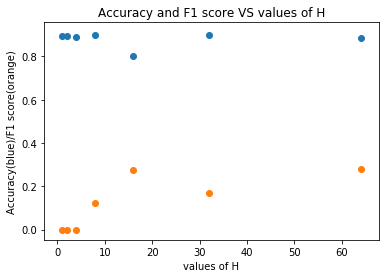

In [136]:
# Plot the accuracy and the F1 score for diﬀerent values of H.
X = np.array([1, 2, 4, 8, 16, 32, 64])
y_acc = np.array([mean1_acc, mean2_acc, mean4_acc, mean8_acc, mean16_acc, mean32_acc, mean64_acc ])
y_f1 = np.array([mean1_f1, mean2_f1, mean4_f1, mean8_f1, mean16_f1, mean32_f1, mean64_f1])
plt.scatter(X,y_acc)
plt.scatter(X,y_f1)
plt.title('Accuracy and F1 score VS values of H')
plt.xlabel('values of H')
plt.ylabel('Accuracy(blue)/F1 score(orange)')
plt.show()

# Task 4  Predicting the Winners in the Pokemon Battles


In [137]:
q4_test = pd.read_csv('./q4_test.csv', sep =',')

In [138]:
#organize data from pokemon to battles
index = 0
for first in battles['First_pokemon']:
    battles.loc[index,'First_Type1'] = pokemon.loc[first-1, 'Type 1']
    battles.loc[index,'First_Type2'] = pokemon.loc[first-1, 'Type 2']
    battles.loc[index,'First_HP'] = pokemon.loc[first-1, 'HP']
    battles.loc[index,'First_Atk'] = pokemon.loc[first-1, 'Attack']
    battles.loc[index,'First_Def'] = pokemon.loc[first-1, 'Defense']
    battles.loc[index,'First_SpAtk'] = pokemon.loc[first-1, 'Sp. Atk']
    battles.loc[index,'First_SpDef'] = pokemon.loc[first-1, 'Sp. Def']
    battles.loc[index,'First_Speed'] = pokemon.loc[first-1, 'Speed']
    battles.loc[index,'First_generation'] = pokemon.loc[first-1, 'Generation']
    battles.loc[index,'First_hasGender'] = pokemon.loc[first-1, 'Has Gender']
    battles.loc[index,'First_legendary'] = pokemon.loc[first-1, 'Legendary']
    index += 1
battles

,First_pokemon,Second_pokemon,Winner,First_Type1,First_Type2,First_HP,First_Atk,First_Def,First_SpAtk,First_SpDef,First_Speed,First_generation,First_hasGender,First_legendary
0,173,463,463,Water,NaN,50.0,65.0,64.0,44.0,48.0,43.0,2.0,True,False
1,174,307,307,Water,NaN,65.0,80.0,80.0,59.0,63.0,58.0,2.0,True,False
2,772,181,772,Fighting,Flying,78.0,92.0,75.0,74.0,63.0,118.0,6.0,True,False
3,430,356,430,Psychic,NaN,50.0,180.0,20.0,180.0,20.0,150.0,3.0,False,True
4,519,695,519,Fire,NaN,75.0,95.0,67.0,125.0,95.0,83.0,4.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,416,778,778,Ice,NaN,80.0,50.0,100.0,100.0,200.0,50.0,3.0,False,True
39996,221,265,265,Bug,Steel,75.0,90.0,140.0,60.0,60.0,40.0,2.0,True,False
39997,35,448,448,Poison,NaN,55.0,47.0,52.0,40.0,40.0,41.0,1.0,True,False
39998,791,713,713,Flying,Dragon,40.0,30.0,35.0,45.0,40.0,55.0,6.0,True,False


In [139]:
#organize data from pokemon to battles
index = 0
for second in battles['Second_pokemon']:
    battles.loc[index,'Second_Type1'] = pokemon.loc[second-1, 'Type 1']
    battles.loc[index,'Second_Type2'] = pokemon.loc[second-1, 'Type 2']
    battles.loc[index,'Second_HP'] = pokemon.loc[second-1, 'HP']
    battles.loc[index,'Second_Atk'] = pokemon.loc[second-1, 'Attack']
    battles.loc[index,'Second_Def'] = pokemon.loc[second-1, 'Defense']
    battles.loc[index,'Second_SpAtk'] = pokemon.loc[second-1, 'Sp. Atk']
    battles.loc[index,'Second_SpDef'] = pokemon.loc[second-1, 'Sp. Def']
    battles.loc[index,'Second_Speed'] = pokemon.loc[second-1, 'Speed']
    battles.loc[index,'Second_generation'] = pokemon.loc[second-1, 'Generation']
    battles.loc[index,'Second_hasGender'] = pokemon.loc[second-1, 'Has Gender']
    battles.loc[index,'Second_legendary'] = pokemon.loc[second-1, 'Legendary']
    index += 1
battles

,First_pokemon,Second_pokemon,Winner,First_Type1,First_Type2,First_HP,First_Atk,First_Def,First_SpAtk,First_SpDef,...,Second_Type2,Second_HP,Second_Atk,Second_Def,Second_SpAtk,Second_SpDef,Second_Speed,Second_generation,Second_hasGender,Second_legendary
0,173,463,463,Water,NaN,50.0,65.0,64.0,44.0,48.0,...,Flying,30.0,30.0,42.0,30.0,42.0,70.0,4.0,True,False
1,174,307,307,Water,NaN,65.0,80.0,80.0,59.0,63.0,...,Fairy,68.0,85.0,65.0,165.0,135.0,100.0,3.0,True,False
2,772,181,772,Fighting,Flying,78.0,92.0,75.0,74.0,63.0,...,Flying,55.0,35.0,50.0,55.0,110.0,85.0,2.0,True,False
3,430,356,430,Psychic,NaN,50.0,180.0,20.0,180.0,20.0,...,NaN,70.0,85.0,140.0,85.0,70.0,20.0,3.0,True,False
4,519,695,519,Fire,NaN,75.0,95.0,67.0,125.0,95.0,...,Dragon,52.0,65.0,50.0,45.0,50.0,38.0,5.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,416,778,778,Ice,NaN,80.0,50.0,100.0,100.0,200.0,...,Fairy,57.0,80.0,91.0,80.0,87.0,75.0,6.0,True,False
39996,221,265,265,Bug,Steel,75.0,90.0,140.0,60.0,60.0,...,NaN,100.0,75.0,115.0,90.0,115.0,85.0,2.0,False,True
39997,35,448,448,Poison,NaN,55.0,47.0,52.0,40.0,40.0,...,NaN,77.0,85.0,51.0,55.0,51.0,65.0,4.0,True,False
39998,791,713,713,Flying,Dragon,40.0,30.0,35.0,45.0,40.0,...,Ice,125.0,120.0,90.0,170.0,100.0,95.0,5.0,False,True


In [140]:
one_hot_type = pd.get_dummies(battles[['First_Type1','First_Type2','Second_Type1','Second_Type2']])
battles = pd.concat([battles, one_hot_type], axis=1)
battles

,First_pokemon,Second_pokemon,Winner,First_Type1,First_Type2,First_HP,First_Atk,First_Def,First_SpAtk,First_SpDef,...,Second_Type2_Ghost,Second_Type2_Grass,Second_Type2_Ground,Second_Type2_Ice,Second_Type2_Normal,Second_Type2_Poison,Second_Type2_Psychic,Second_Type2_Rock,Second_Type2_Steel,Second_Type2_Water
0,173,463,463,Water,NaN,50.0,65.0,64.0,44.0,48.0,...,0,0,0,0,0,0,0,0,0,0
1,174,307,307,Water,NaN,65.0,80.0,80.0,59.0,63.0,...,0,0,0,0,0,0,0,0,0,0
2,772,181,772,Fighting,Flying,78.0,92.0,75.0,74.0,63.0,...,0,0,0,0,0,0,0,0,0,0
3,430,356,430,Psychic,NaN,50.0,180.0,20.0,180.0,20.0,...,0,0,0,0,0,0,0,0,0,0
4,519,695,519,Fire,NaN,75.0,95.0,67.0,125.0,95.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,416,778,778,Ice,NaN,80.0,50.0,100.0,100.0,200.0,...,0,0,0,0,0,0,0,0,0,0
39996,221,265,265,Bug,Steel,75.0,90.0,140.0,60.0,60.0,...,0,0,0,0,0,0,0,0,0,0
39997,35,448,448,Poison,NaN,55.0,47.0,52.0,40.0,40.0,...,0,0,0,0,0,0,0,0,0,0
39998,791,713,713,Flying,Dragon,40.0,30.0,35.0,45.0,40.0,...,0,0,0,1,0,0,0,0,0,0


In [141]:
# set bool label of whether the first pokemon wins
index = 0
for winner in battles['Winner']:
    if winner == battles.loc[index, 'First_pokemon']:
        battles.loc[index,'First_win'] = 1
    else:
        battles.loc[index,'First_win'] = 0
    index += 1

In [142]:
battles['First_hasGender']= battles['First_hasGender'].astype(bool)
battles['Second_hasGender']= battles['Second_hasGender'].astype(bool)
battles['First_legendary']= battles['First_hasGender'].astype(bool)
battles['Second_legendary']= battles['Second_hasGender'].astype(bool)
battles['First_win']= battles['First_win'].astype(int)

In [143]:
# report best 3 hyperparameters
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [149]:
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
random_dist = {'hidden_layer_sizes': [(20, ), (10,), (15,)],
               'solver': ['sgd', 'adam'],
               'learning_rate': ['constant', 'invscaling', 'adaptive'],
               'learning_rate_init': loguniform(1e-3, 1e0),
               'activation': ['tanh', 'relu'],
               'random_state':[4211]}

mlp = MLPClassifier()
X_all = pd.concat([battles.iloc[:,0:1],battles.iloc[:,5:14]],axis=1)
X_all = pd.concat([X_all,battles.iloc[:,17:96]],axis=1)
y_all = battles['First_win']

mlp = MLPClassifier()
random_search = RandomizedSearchCV(
    mlp, random_dist, n_iter=10, cv=5, verbose=3, random_state=4211)

random_search.fit(X_all, y_all)

report(random_search.cv_results_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd, score=0.941, total=   9.2s
[CV] activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.1s remaining:    0.0s


[CV]  activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd, score=0.946, total=   7.8s
[CV] activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.9s remaining:    0.0s


[CV]  activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd, score=0.937, total=   6.8s
[CV] activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd, score=0.934, total=   7.8s
[CV] activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(20,), learning_rate=constant, learning_rate_init=0.0014345289151653472, random_state=4211, solver=sgd, score=0.932, total=   9.2s
[CV] activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.0037248347469766643, random_state=4211, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(10,

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd, score=0.528, total=  14.8s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd, score=0.528, total=  15.3s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd, score=0.528, total=  18.1s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd, score=0.528, total=  18.8s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.8852296611737694, random_state=4211, solver=sgd, score=0.528, total=  16.2s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=adaptive, learning_rate_init=0.03763198853223679, random_state=4211, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=adaptive, learning_rate_init=0.03763198853223679, random_state=4211, solver=adam, score=0.899, total=   2.1s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=adaptive, learning_rate_init=0.03763198853223679, random_state=4211, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=adaptive, learning_rate_init=0.03763198853223679, random_state=4211, solver=adam, score=0.888, total=   2.2s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=adaptive, learning_rate_init=0.03763198853223679, random_state=4211, solver=adam 
[CV]  activation=relu, hidden_layer_sizes=(15,), lea

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd, score=0.868, total=  13.2s
[CV] activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd, score=0.850, total=  12.6s
[CV] activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd, score=0.851, total=  12.5s
[CV] activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd 


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd, score=0.905, total=  12.7s
[CV] activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd 
[CV]  activation=tanh, hidden_layer_sizes=(10,), learning_rate=invscaling, learning_rate_init=0.0116849482224164, random_state=4211, solver=sgd, score=0.573, total=   1.0s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=constant, learning_rate_init=0.03759318429083023, random_state=4211, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=constant, learning_rate_init=0.03759318429083023, random_state=4211, solver=sgd, score=0.528, total=   1.3s
[CV] activation=relu, hidden_layer_sizes=(15,), learning_rate=constant, learning_rate_init=0.03759318429083023, random_state=4211, solver=sgd 
[CV]  activation=relu, hidden_layer_sizes=(15,), learni

[CV]  activation=relu, hidden_layer_sizes=(15,), learning_rate=invscaling, learning_rate_init=0.006456100414107124, random_state=4211, solver=sgd, score=0.528, total=   1.3s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.4min finished


Model with rank: 1
Mean validation score: 0.938 (std: 0.005)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'learning_rate_init': 0.0014345289151653472, 'random_state': 4211, 'solver': 'sgd'}

Model with rank: 2
Mean validation score: 0.933 (std: 0.009)
Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling', 'learning_rate_init': 0.0058235839931391415, 'random_state': 4211, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.893 (std: 0.005)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (15,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.03763198853223679, 'random_state': 4211, 'solver': 'adam'}



In [145]:
#organize data from pokemon to q4_test
index = 0
for first in q4_test['First_pokemon']:
    q4_test.loc[index,'First_Type1'] = pokemon.loc[first-1, 'Type 1']
    q4_test.loc[index,'First_Type2'] = pokemon.loc[first-1, 'Type 2']
    q4_test.loc[index,'First_HP'] = pokemon.loc[first-1, 'HP']
    q4_test.loc[index,'First_Atk'] = pokemon.loc[first-1, 'Attack']
    q4_test.loc[index,'First_Def'] = pokemon.loc[first-1, 'Defense']
    q4_test.loc[index,'First_SpAtk'] = pokemon.loc[first-1, 'Sp. Atk']
    q4_test.loc[index,'First_SpDef'] = pokemon.loc[first-1, 'Sp. Def']
    q4_test.loc[index,'First_Speed'] = pokemon.loc[first-1, 'Speed']
    q4_test.loc[index,'First_generation'] = pokemon.loc[first-1, 'Generation']
    q4_test.loc[index,'First_hasGender'] = pokemon.loc[first-1, 'Has Gender']
    q4_test.loc[index,'First_legendary'] = pokemon.loc[first-1, 'Legendary']
    index += 1
index = 0
for second in q4_test['Second_pokemon']:
    q4_test.loc[index,'Second_Type1'] = pokemon.loc[second-1, 'Type 1']
    q4_test.loc[index,'Second_Type2'] = pokemon.loc[second-1, 'Type 2']
    q4_test.loc[index,'Second_HP'] = pokemon.loc[second-1, 'HP']
    q4_test.loc[index,'Second_Atk'] = pokemon.loc[second-1, 'Attack']
    q4_test.loc[index,'Second_Def'] = pokemon.loc[second-1, 'Defense']
    q4_test.loc[index,'Second_SpAtk'] = pokemon.loc[second-1, 'Sp. Atk']
    q4_test.loc[index,'Second_SpDef'] = pokemon.loc[second-1, 'Sp. Def']
    q4_test.loc[index,'Second_Speed'] = pokemon.loc[second-1, 'Speed']
    q4_test.loc[index,'Second_generation'] = pokemon.loc[second-1, 'Generation']
    q4_test.loc[index,'Second_hasGender'] = pokemon.loc[second-1, 'Has Gender']
    q4_test.loc[index,'Second_legendary'] = pokemon.loc[second-1, 'Legendary']
    index += 1
one_hot_type = pd.get_dummies(q4_test[['First_Type1','First_Type2','Second_Type1','Second_Type2']])
q4_test = pd.concat([q4_test, one_hot_type], axis=1)
index = 0
for winner in q4_test['Winner']:
    if winner == q4_test.loc[index, 'First_pokemon']:
        q4_test.loc[index,'First_win'] = 1
    else:
        q4_test.loc[index,'First_win'] = 0
    index += 1
q4_test['First_hasGender']= q4_test['First_hasGender'].astype(bool)
q4_test['Second_hasGender']= q4_test['Second_hasGender'].astype(bool)
q4_test['First_legendary']= q4_test['First_hasGender'].astype(bool)
q4_test['Second_legendary']= q4_test['Second_hasGender'].astype(bool)
q4_test['First_win']= q4_test['First_win'].astype(int)
X_test = pd.concat([q4_test.iloc[:,0:1],q4_test.iloc[:,5:14]],axis=1)
X_test = pd.concat([X_test,q4_test.iloc[:,17:96]],axis=1)
y_test = q4_test['First_win']

The accuracy: 0.9318
Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(20,), learning_rate='constant',
              learning_rate_init=0.0014345289151653472, max_fun=15000,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5, random_state=4211,
              shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
              verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      5282
           1       0.94      0.92      0.93      4718

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000


Confusion matrix:
[[5000  282]
 [ 400 4318]]


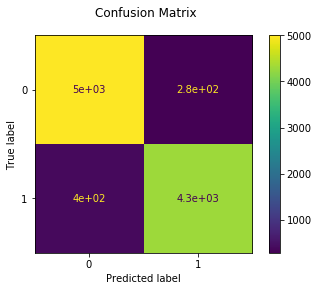

In [150]:
#report accuracy and confusion matrix
from sklearn.metrics import classification_report, plot_confusion_matrix

predicted = random_search.predict(X_test)
print('The accuracy:', accuracy_score(y_test, predicted))
print("Classification report for classifier %s:\n%s\n"
      % (random_search.best_estimator_, classification_report(y_test, predicted)))

disp = plot_confusion_matrix(random_search, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)